<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [4]:
## Write your code here
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None


In [5]:
print(df.describe(include="object"))

                            MainBranch              Age           Employment  \
count                            65437            65437                65437   
unique                               5                8                  110   
top     I am a developer by profession  25-34 years old  Employed, full-time   
freq                             50207            23911                39041   

                                  RemoteWork   Check CodingActivities  \
count                                  54806   65437            54466   
unique                                     3       1              118   
top     Hybrid (some remote, some in-person)  Apples            Hobby   
freq                                   23015   65437             9993   

                                             EdLevel  \
count                                          60784   
unique                                             8   
top     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
freq     

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [6]:
## Write your code here
# Count missing values in each column
missing_values = df.isnull().sum()
# Display columns with missing values
print(missing_values[missing_values > 0])

RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



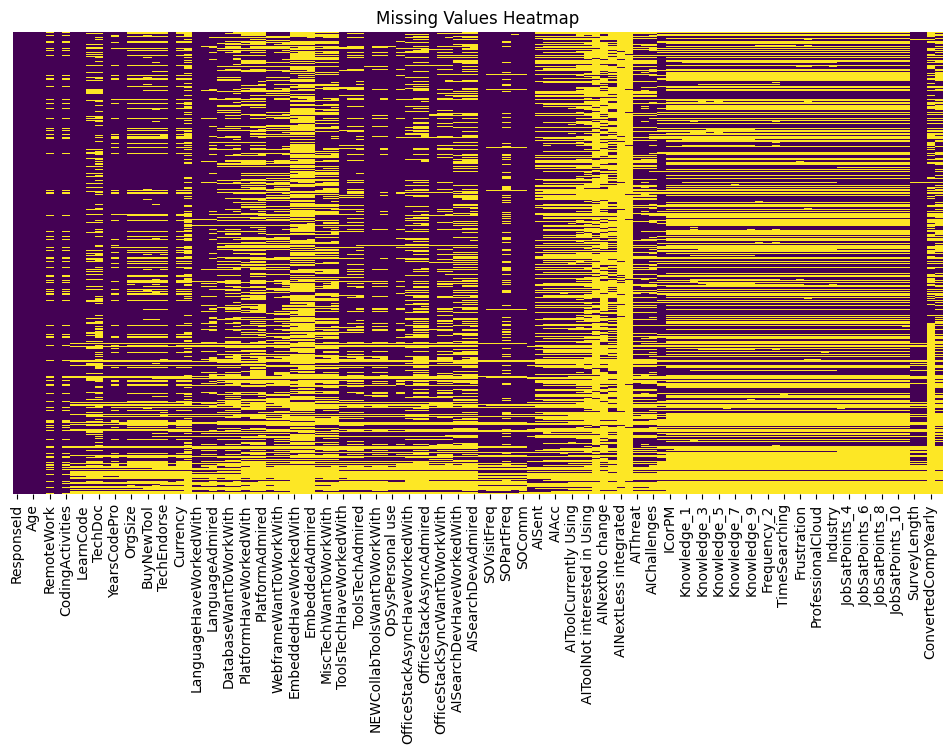

In [7]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Create heatmap
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)

plt.title("Missing Values Heatmap")
plt.show()


##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [8]:
## Write your code here
# Count missing values in the "Employment" column
missing_employment = df["Employment"].isnull().sum()
print(f"Missing values in 'Employment' column: {missing_employment}")

Missing values in 'Employment' column: 0


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [9]:
## Write your code here
# Find the most frequent (mode) value in the "Employment" column
most_frequent_value = df["Employment"].mode()[0]
print(f"Most frequent value in 'Employment' column: {most_frequent_value}")



Most frequent value in 'Employment' column: Employed, full-time


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [10]:
## Write your code here
# Count occurrences of each unique value in "Employment"
employment_counts = df["Employment"].value_counts()
print(employment_counts)


# Fill missing values with the most frequent value
df["Employment"].fillna(most_frequent_value, inplace=True)
# Verify that missing values are filled
print(df["Employment"].isnull().sum())  # Should print 0


Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

/tmp/ipykernel_1736/3102004308.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Employment"].fillna(most_frequent_value, inplace=True)


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


/tmp/ipykernel_1736/3700596740.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Employment"].fillna(df["Employment"].mode()[0], inplace=True)
/tmp/ipykernel_1736/3700596740.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Employment", palette="viridis")


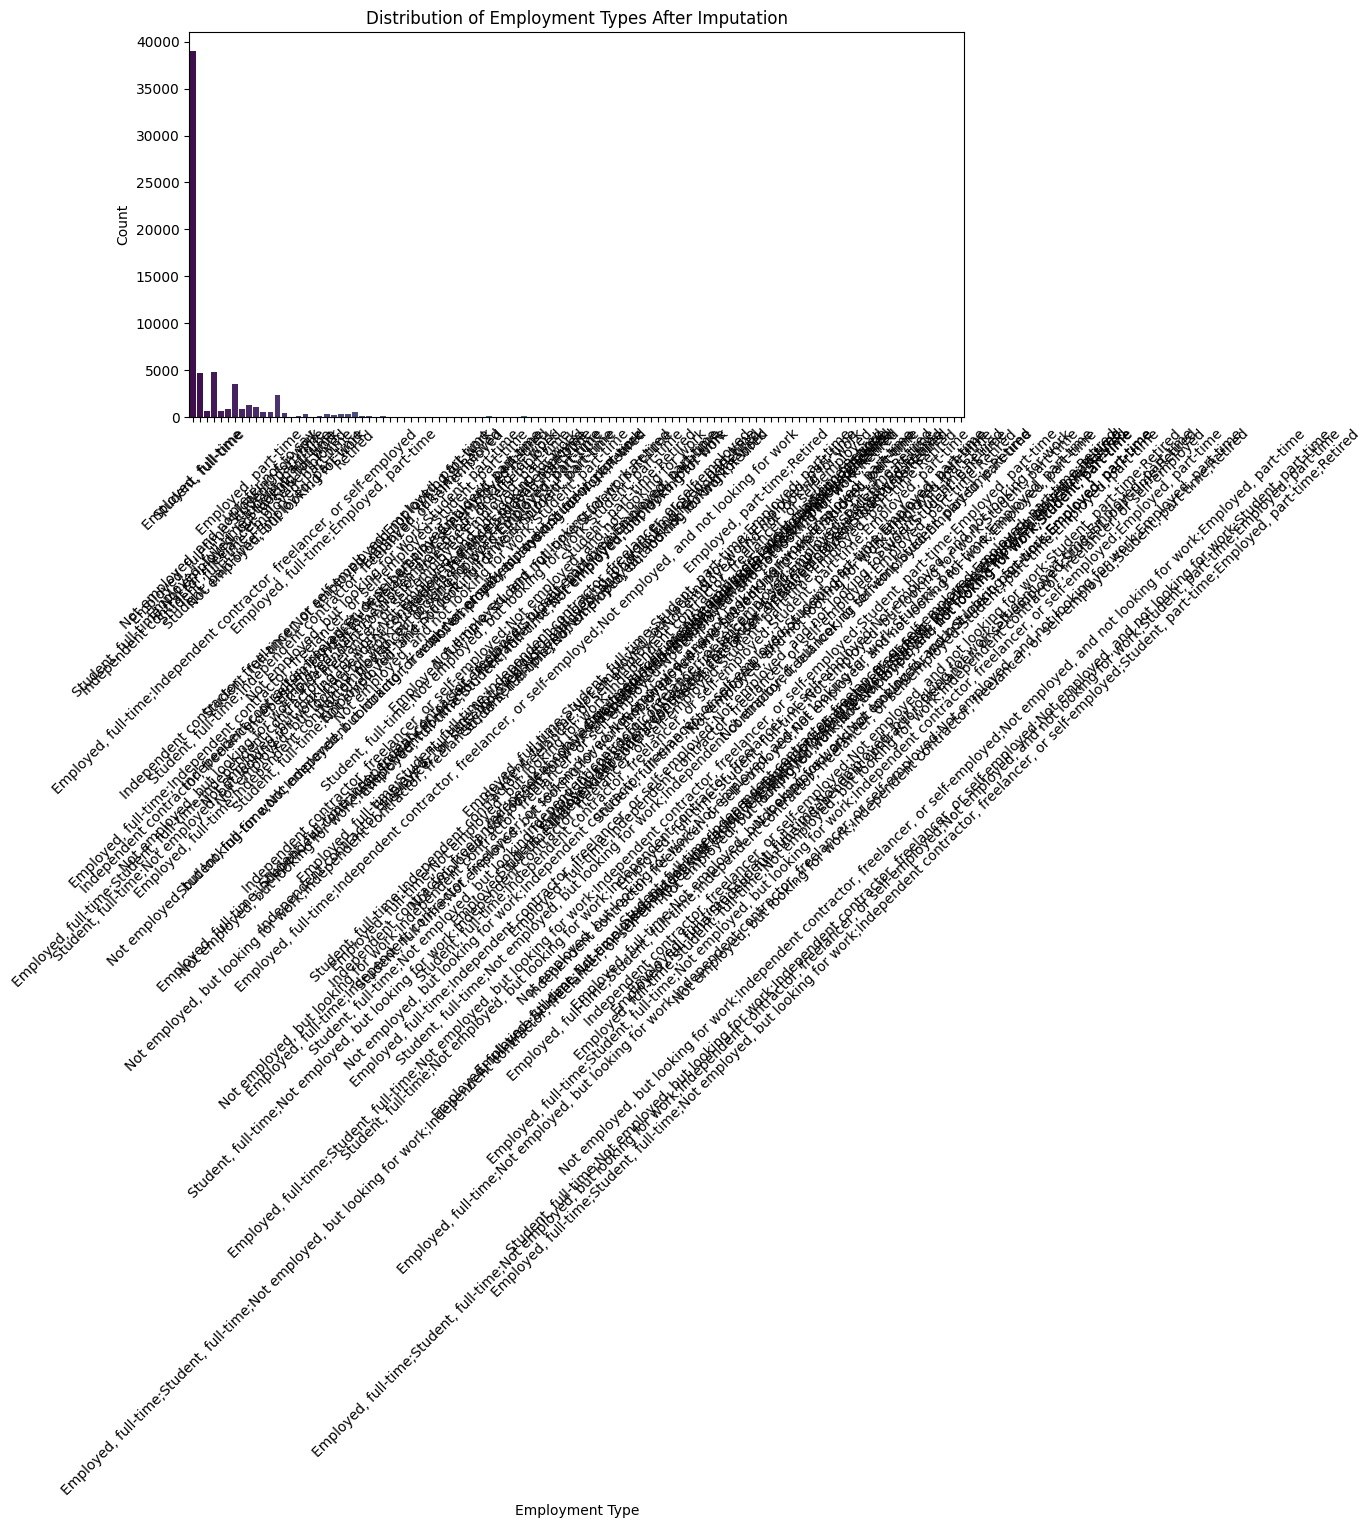

In [14]:
# Fill missing values with the most frequent value (if not already done)
df["Employment"].fillna(df["Employment"].mode()[0], inplace=True)

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Employment", palette="viridis")

# Customize plot
plt.xticks(rotation=45)
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.title("Distribution of Employment Types After Imputation")
plt.show()


In [15]:
## Write your code here
# Count Employment distribution before imputation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

employment_before = df_before["Employment"].value_counts()

# Count Employment distribution after imputation
employment_after = df["Employment"].value_counts()

# Plot comparison
plt.figure(figsize=(12, 6))

# Before Imputation
plt.subplot(1, 2, 1)
sns.barplot(x=employment_before.index, y=employment_before.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Before Imputation")
plt.xlabel("Employment Type")
plt.ylabel("Count")

# After Imputation
plt.subplot(1, 2, 2)
sns.barplot(x=employment_after.index, y=employment_after.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("After Imputation")
plt.xlabel("Employment Type")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


NameError: name 'df_before' is not defined

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
